In [8]:
import pandas as pd
from copy import deepcopy
from collections import Counter

In [9]:
def clean_series(series: pd.Series) -> pd.Series:
    # Apply the transformations to each element of the series
    return series.astype(str).str.strip().str.rstrip('.')

# def clean_series(series: pd.Series) -> pd.Series:
#     # Apply the transformations to each element of the series
#     return series

def clean_abstract_column(df):
    # Check if 'abstract' column exists
    if 'abstract' in df.columns:
        # Apply the cleaning process to each entry in the 'abstract' column
        df['abstract'] = clean_series(df['abstract'].str.replace('<i>', '', regex=False)\
                                       .str.replace('</i>', '', regex=False)\
                                       .str.replace('<b>', '', regex=False)\
                                       .str.replace('</b>', '', regex=False)\
                                       .str.replace('\n', ' ', regex=False))
    if 'title' in df.columns:
        # Apply the cleaning process to each entry in the 'abstract' column
        df['title'] = clean_series(df['title'].str.replace('<i>', '', regex=False)\
                                       .str.replace('</i>', '', regex=False)\
                                       .str.replace('<b>', '', regex=False)\
                                       .str.replace('</b>', '', regex=False)\
                                       .str.replace('\n', ' ', regex=False))
        
    else:
        print("The 'abstract' column does not exist in the DataFrame.")
    
    return df

def merge_by_title_and_abstract(df):
    # First, handle cases where titles are the same
    grouped_by_title = df.groupby('title', as_index=False).agg({
        'abstract': lambda x: '\n==========\n'.join([str(item) for item in set(x) if pd.notna(item)]),
        'source': lambda x: ','.join(set(x))
    })
    
    # Next, handle cases where abstracts are the same but titles are different
    grouped_by_abstract = grouped_by_title.groupby('abstract', as_index=False).agg({
        'title': lambda x: '\n==========\n'.join([str(item) for item in set(x) if pd.notna(item)]),
        'source': lambda x: ','.join(set(x))
    })
    
    return grouped_by_abstract[['title', "abstract", 'source']]

# Load your data (assuming it's a CSV file)
df = pd.read_csv('data/0_all.csv')[['title', 'abstract', 'source']]
print("Total:", df.shape)
print("By source:", Counter(df.source))
# display(df[df.title.fillna('').str.contains('varchat', case=False)])
df = clean_abstract_column(df)
print(df.shape)
df = merge_by_title_and_abstract(df)
df['title_abstract'] = df['title'] + ' ' + df['abstract']
df

Total: (27391, 3)
By source: Counter({'PubMed': 9962, 'biorxiv': 8697, 'arXiv': 4519, 'medrxiv': 4213})
(27391, 3)


,title,abstract,source,title_abstract
0,Can Large Language Models Unlock Novel Scienti...,"""An idea is nothing more nor less than a new c...",arXiv,Can Large Language Models Unlock Novel Scienti...
1,A non-adaptive explanation for macroevolutiona...,"""Complex multicellularity"", conventionally def...",biorxiv,A non-adaptive explanation for macroevolutiona...
2,Electric Vehicle Sales Forecasting Model Consi...,"""Green Premiums"" which means the difference in...",arXiv,Electric Vehicle Sales Forecasting Model Consi...
3,Optimizing Performance of Transformer-based Mo...,"""Just Accepted"" papers have undergone full pee...",PubMed,Optimizing Performance of Transformer-based Mo...
4,An integrative taxonomic treatment of the Myce...,"""Open ended"" or ""dark taxa"" are species-rich c...",biorxiv,An integrative taxonomic treatment of the Myce...
...,...,...,...,...
24185,Using the Chat Generative Pre-trained Transfor...,to map the scientific literature regarding the...,PubMed,Using the Chat Generative Pre-trained Transfor...
24186,A systematic structure-function characterizati...,α-neurexins are essential and highly expressed...,PubMed,A systematic structure-function characterizati...
24187,Context base editing for splice correction of ...,β-Thalassemia is brought about by defective β-...,PubMed,Context base editing for splice correction of ...
24188,Establishment and validation of a tumor-infilt...,γδT cells are unconventional T cells only acco...,PubMed,Establishment and validation of a tumor-infilt...


In [10]:
len(df.abstract), len(df.abstract.unique())

(24190, 24190)

## Raw check

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate the number of articles from each source and plot a histogram with seaborn
def plot_article_source_histogram(df, save_path=None):
    # Filter out rows where 'title' or 'abstract' are missing
    df_cleaned = df.dropna(subset=['title', 'abstract'])
    
    # Count the number of articles per source
    article_count_per_source = df_cleaned['source'].value_counts().reset_index()
    article_count_per_source.columns = ['source', 'count']

    # Plot the histogram using seaborn with pastel colors and black border
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='source', y='count', data=article_count_per_source, palette='pastel', edgecolor='black', linewidth=1.5)
    
    # Add values above each bar
    for index, row in article_count_per_source.iterrows():
        ax.text(index, row['count'] + 0.1, int(row['count']), color='black', ha="center", fontsize=10)
    
    # Customizing the plot
    plt.title('Number of Articles from Each Source', fontsize=14)
    plt.xlabel('Source', fontsize=12)
    plt.ylabel('Number of Articles', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, format='pdf')

    # Show the plot
    plt.show()

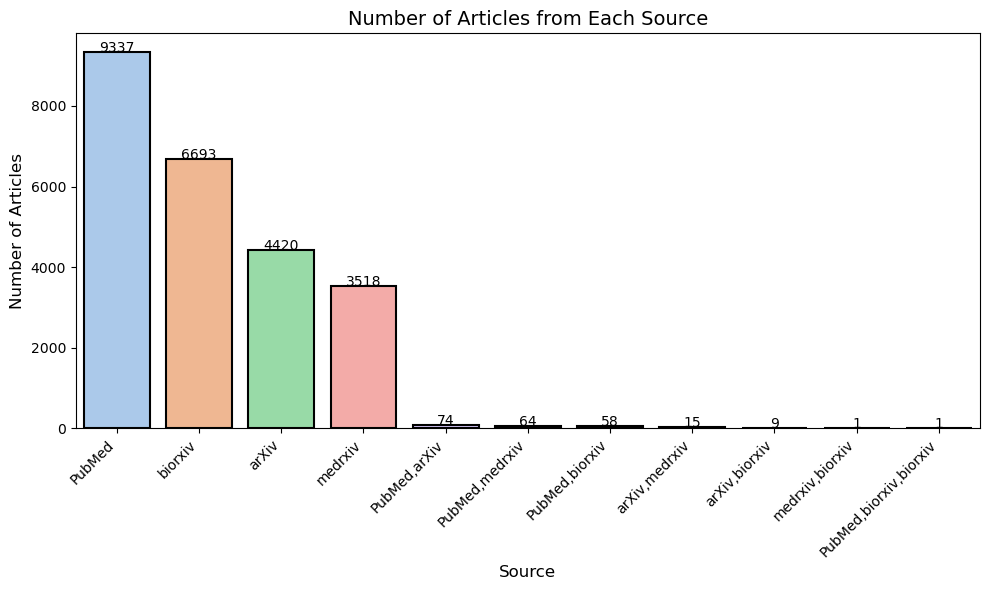

In [16]:
# Plot the histogram for the first time with all articles
initial_histogram = plot_article_source_histogram(df, save_path="Fig2.pdf")


initial_histogram

In [13]:
initial_histogram

In [6]:
from collections import Counter

Counter(df.source)

Counter({'PubMed': 9337,
         'biorxiv': 6693,
         'arXiv': 4420,
         'medrxiv': 3518,
         'arXiv,PubMed': 74,
         'medrxiv,PubMed': 64,
         'biorxiv,PubMed': 58,
         'medrxiv,arXiv': 15,
         'biorxiv,arXiv': 9,
         'biorxiv,medrxiv': 1,
         'biorxiv,biorxiv,PubMed': 1})

In [41]:
df.to_csv("data/cleaned.csv", index=False)

## Basic text stuff

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [45]:
# Example function for TF-IDF and frequency (count) analysis
def extract_tfidf_and_frequency(df, text_column):
    # TF-IDF Vectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df[text_column])
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

    # Frequency (Count) Vectorizer
    count_vectorizer = CountVectorizer(stop_words='english', max_features=100)
    count_matrix = count_vectorizer.fit_transform(df[text_column])
    count_feature_names = count_vectorizer.get_feature_names_out()
    count_df = pd.DataFrame(count_matrix.toarray(), columns=count_feature_names)

    return tfidf_df, count_df

# Function to handle title, abstract, and both
def analyze_title_abstract(df):
    # TF-IDF and frequency for title
    title_tfidf, title_count = extract_tfidf_and_frequency(df, 'title')

    # TF-IDF and frequency for abstract
    abstract_tfidf, abstract_count = extract_tfidf_and_frequency(df, 'abstract')

    # TF-IDF and frequency for title + abstract
    title_abstract_tfidf, title_abstract_count = extract_tfidf_and_frequency(df, 'title_abstract')

    return title_tfidf, title_count, abstract_tfidf, abstract_count, title_abstract_tfidf, title_abstract_count




def plot_top_terms(df, title, top_n=20):
    """
    Plots the top N terms from a DataFrame where each column represents a term
    and each row represents a document.
    """
    # Get average scores per term
    term_scores = df.mean().sort_values(ascending=False).head(top_n)
    
    # Create a DataFrame for plotting
    term_df = pd.DataFrame({'term': term_scores.index, 'score': term_scores.values})
    
    # Plotting using seaborn and pastel colors
    sns.set(style="whitegrid", palette="pastel")
    plt.figure(figsize=(10, 20))
    sns.barplot(x="score", y="term", data=term_df, palette="pastel")
    plt.title(f"Top {top_n} Terms for {title}")
    plt.xlabel("Score")
    plt.ylabel("Term")
    plt.show()

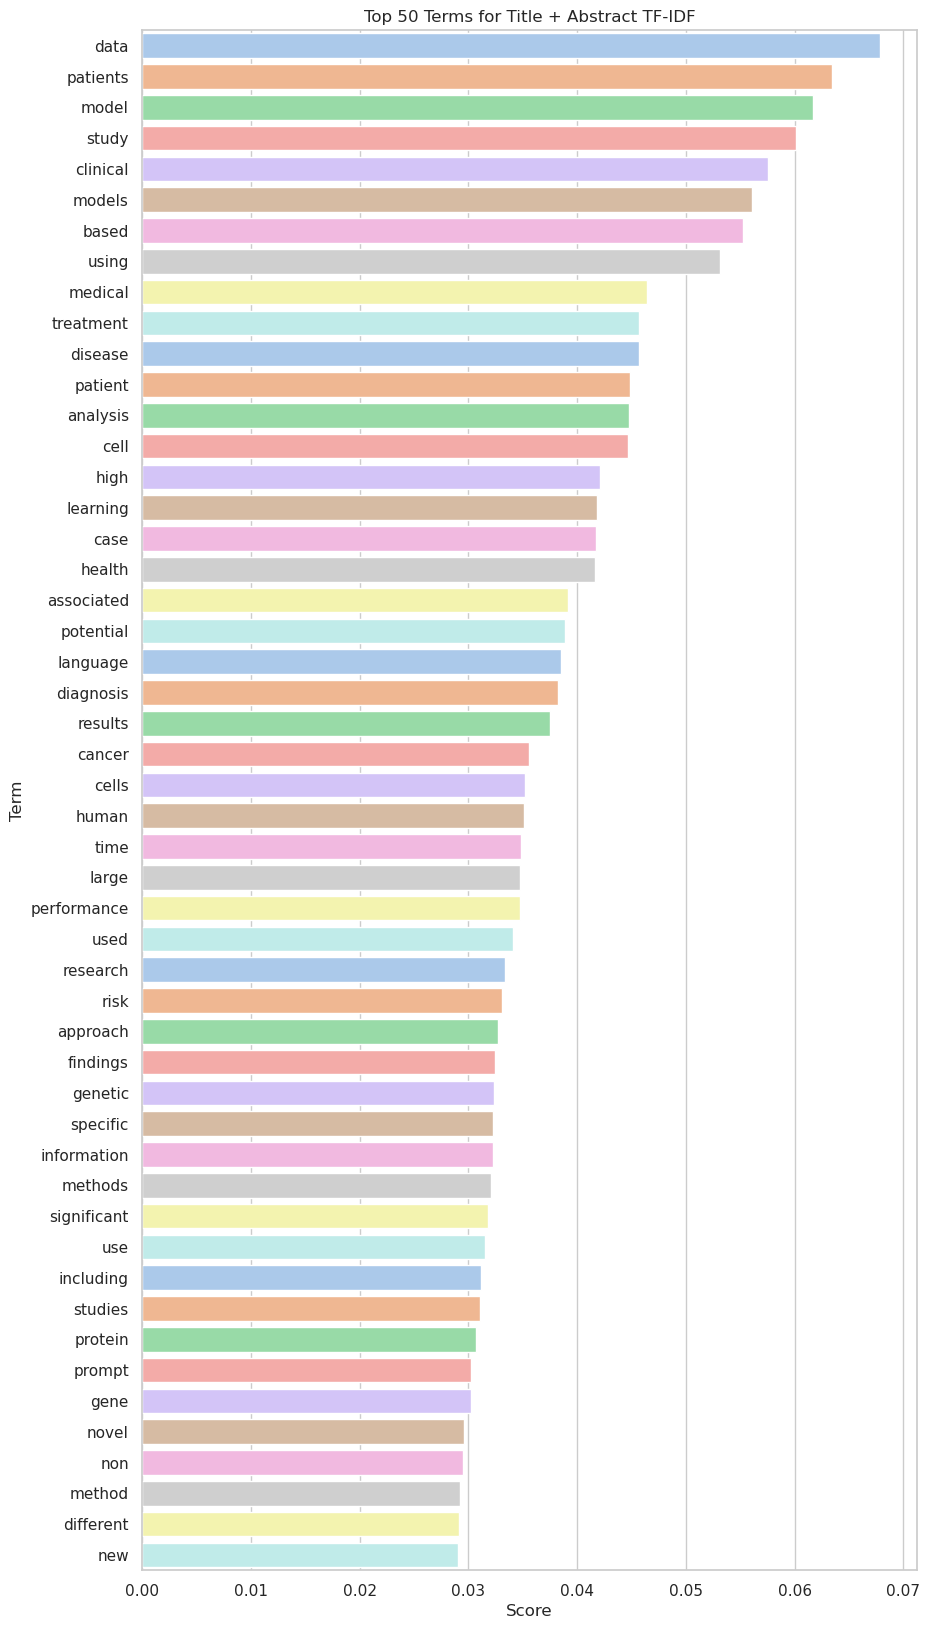

In [46]:
title_tfidf, title_count, abstract_tfidf, abstract_count, title_abstract_tfidf, title_abstract_count = analyze_title_abstract(df_cleaned)


# Example usage
# # Plot for title TF-IDF
# plot_top_terms(title_tfidf, "Title TF-IDF")
# # # Plot for title count
# # plot_top_terms(title_count, "Title Term Frequency")

# # Plot for abstract TF-IDF
# plot_top_terms(abstract_tfidf, "Abstract TF-IDF")
# # # Plot for abstract count
# # plot_top_terms(abstract_count, "Abstract Term Frequency")

# Plot for combined title and abstract TF-IDF
plot_top_terms(title_abstract_tfidf, "Title + Abstract TF-IDF", 50)
# # Plot for combined title and abstract count
# plot_top_terms(title_abstract_count, "Title + Abstract Term Frequency")

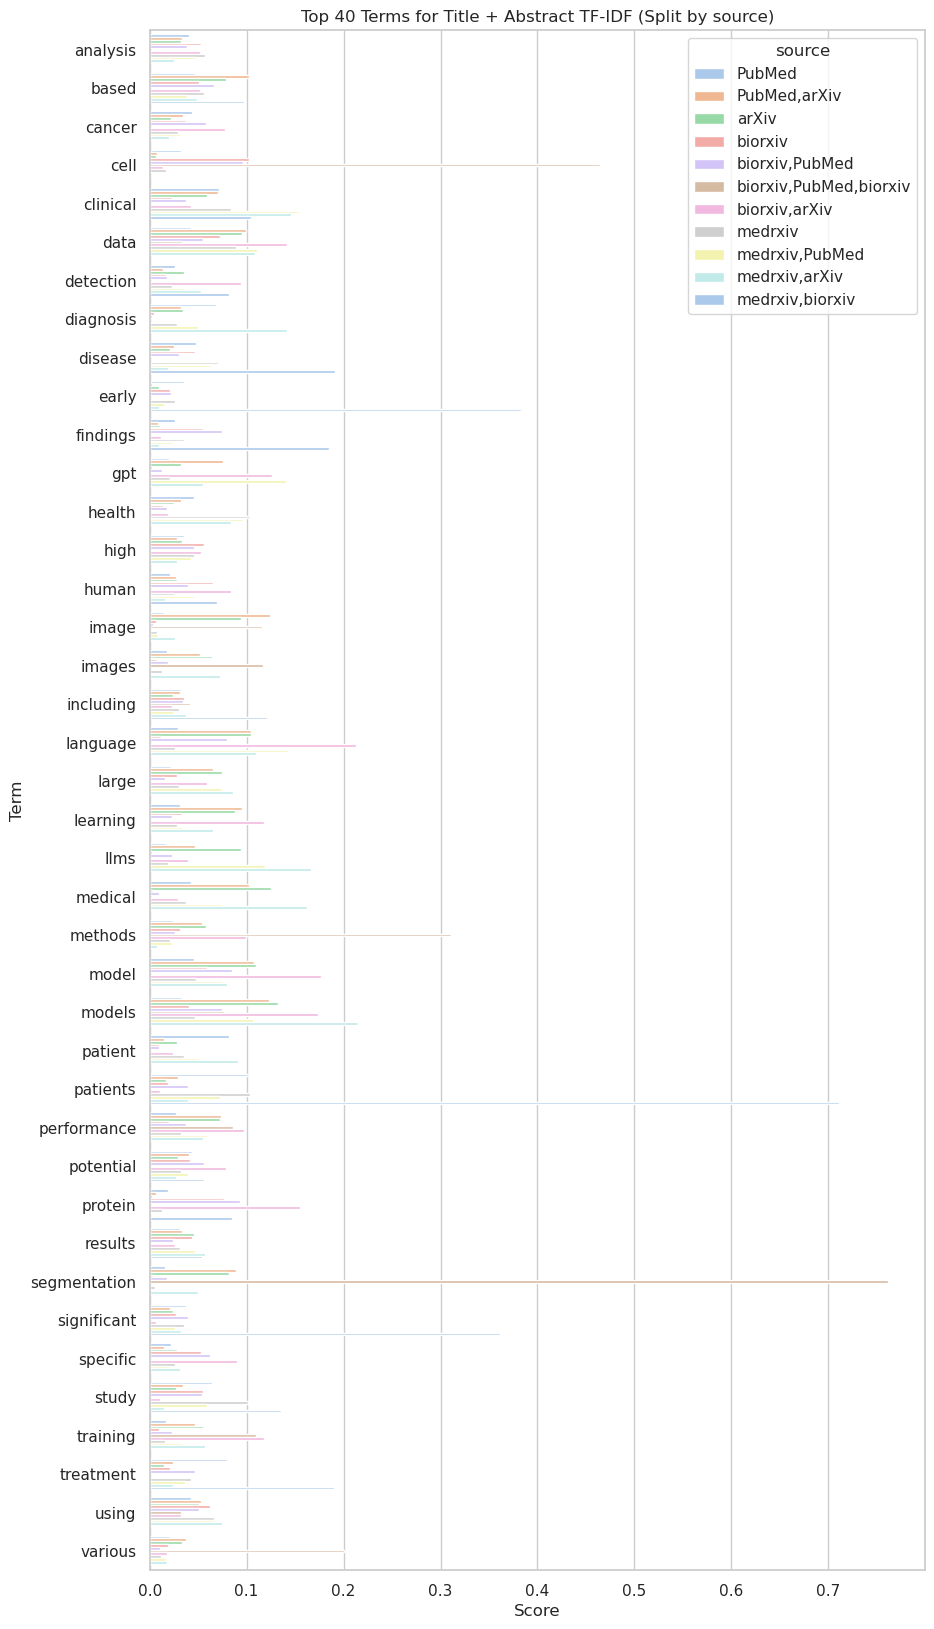

In [47]:

def plot_top_terms_with_source(df, source_col, title, top_n=40):
    """
    Plots the top N terms from a DataFrame where each column represents a term
    and each row represents a document, splitting bars based on the source column.
    """
    # Melt the dataframe to long format for seaborn, keeping the source column
    df_long = df.melt(id_vars=[source_col], var_name="term", value_name="score")
    
    # Group by source and term, and compute mean score per group
    df_grouped = df_long.groupby([source_col, "term"]).mean().reset_index()
    
    # Select the top N terms by average score across all sources
    top_terms = df_grouped.groupby("term")["score"].mean().sort_values(ascending=False).head(top_n).index
    df_top = df_grouped[df_grouped["term"].isin(top_terms)]
    
    # Plotting
    sns.set(style="whitegrid", palette="pastel")
    plt.figure(figsize=(10, 20))
    
    # Create a grouped bar plot where bars are split by source
    sns.barplot(x="score", y="term", hue=source_col, data=df_top, palette="pastel")
    
    # Customize the plot
    plt.title(f"Top {top_n} Terms for {title} (Split by {source_col})")
    plt.xlabel("Score")
    plt.ylabel("Term")
    plt.legend(title=source_col)
    plt.show()

# Example usage:
# Assuming 'source' column is available in your dataframe (e.g., journal name, study type)
# Plot for title+abstract TF-IDF, splitting bars by source
plot_top_terms_with_source(title_abstract_tfidf.assign(source=df['source']), 'source', "Title + Abstract TF-IDF")

## Same for bigrams and trigrams

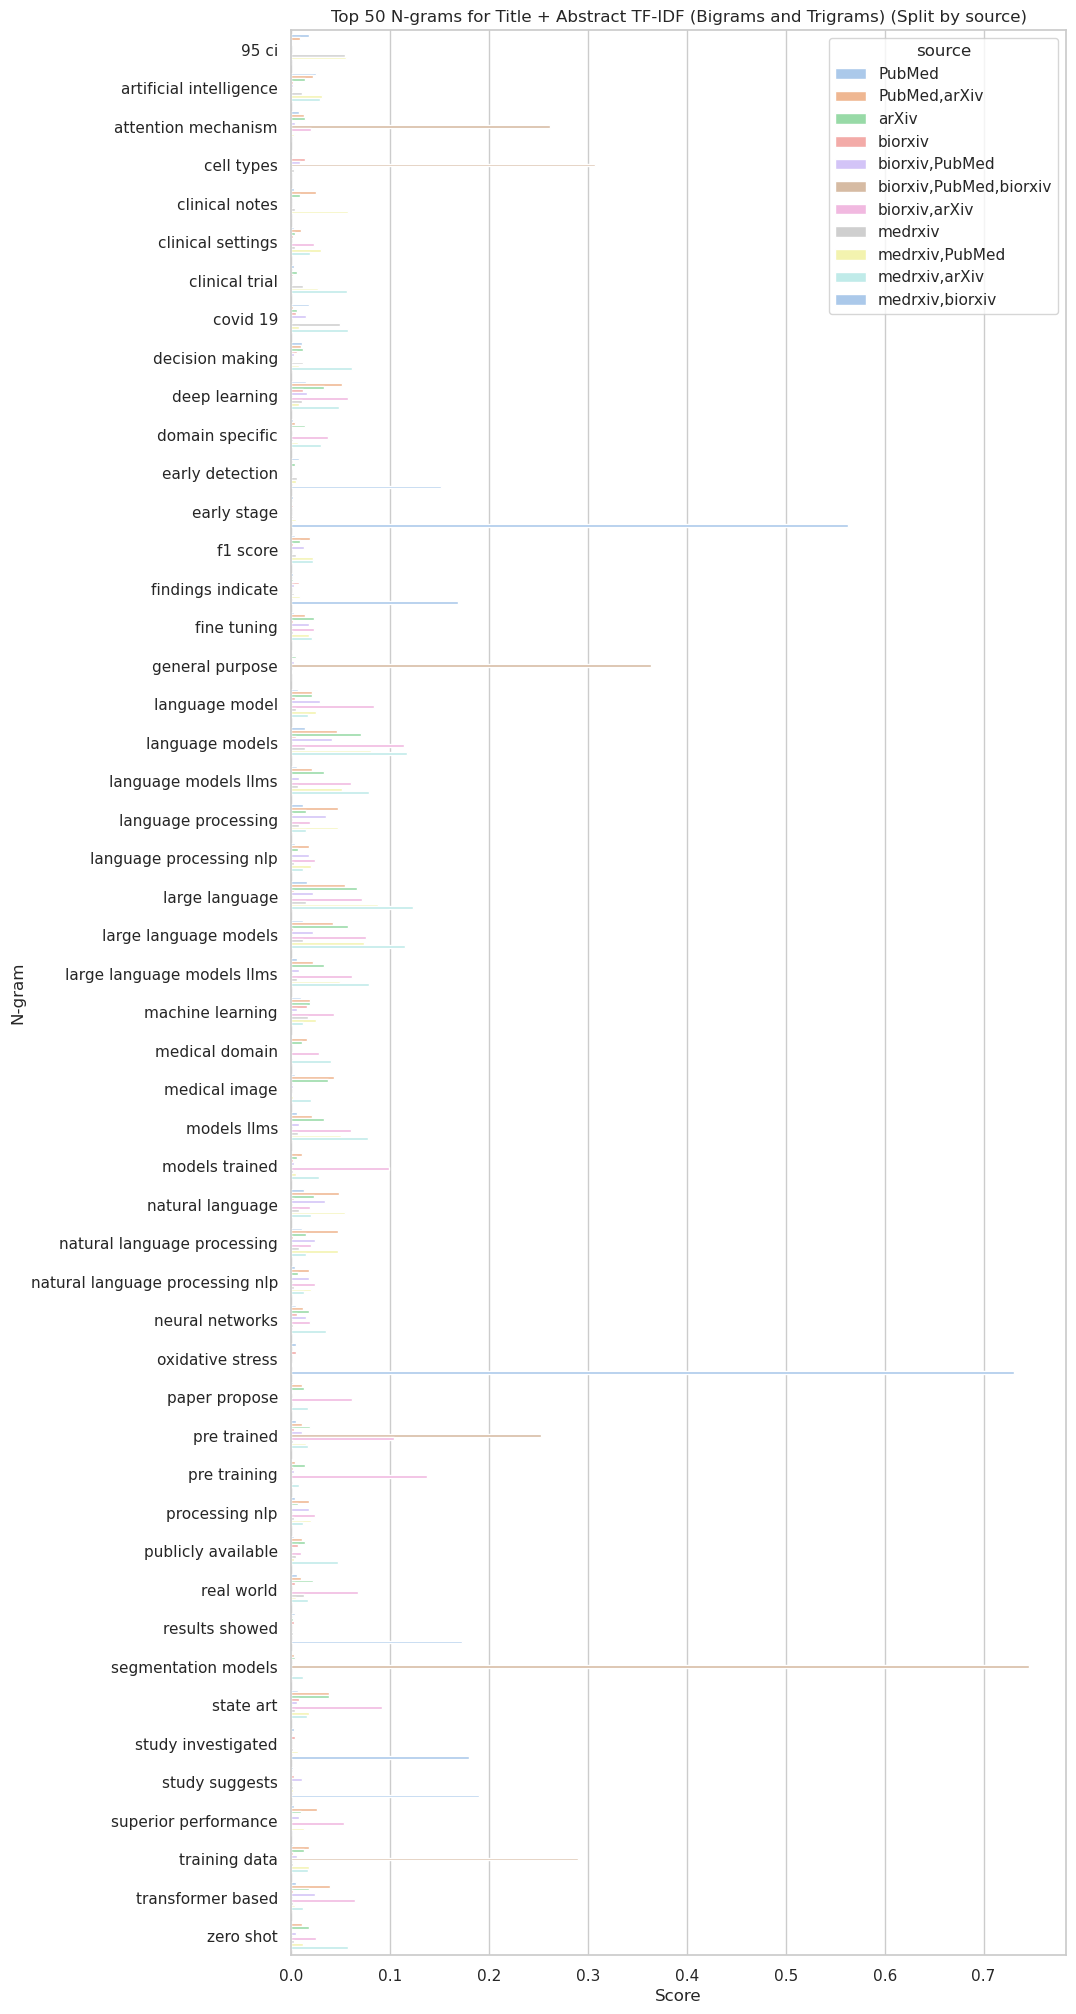

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Modify the TF-IDF extraction function to handle n-grams
def extract_tfidf_and_frequency_ngrams(df, text_column, ngram_range=(2, 3)):
    # TF-IDF Vectorizer for bigrams and trigrams
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=ngram_range, max_features=1000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df[text_column])
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

    # Frequency (Count) Vectorizer for bigrams and trigrams
    count_vectorizer = CountVectorizer(stop_words='english', ngram_range=ngram_range, max_features=1000)
    count_matrix = count_vectorizer.fit_transform(df[text_column])
    count_feature_names = count_vectorizer.get_feature_names_out()
    count_df = pd.DataFrame(count_matrix.toarray(), columns=count_feature_names)

    return tfidf_df, count_df

# Function to plot bigrams and trigrams with source column
def plot_top_ngrams_with_source(df, source_col, title, top_n=50):
    """
    Plots the top N n-grams from a DataFrame where each column represents a term
    (bigram or trigram) and each row represents a document, splitting bars based on the source column.
    """
    # Melt the dataframe to long format for seaborn, keeping the source column
    df_long = df.melt(id_vars=[source_col], var_name="term", value_name="score")
    
    # Group by source and term, and compute mean score per group
    df_grouped = df_long.groupby([source_col, "term"]).mean().reset_index()
    
    # Select the top N terms by average score across all sources
    top_terms = df_grouped.groupby("term")["score"].mean().sort_values(ascending=False).head(top_n).index
    df_top = df_grouped[df_grouped["term"].isin(top_terms)]
    
    # Plotting
    sns.set(style="whitegrid", palette="pastel")
    plt.figure(figsize=(10, 25))
    
    # Create a grouped bar plot where bars are split by source
    sns.barplot(x="score", y="term", hue=source_col, data=df_top, palette="pastel")
    
    # Customize the plot
    plt.title(f"Top {top_n} N-grams for {title} (Split by {source_col})")
    plt.xlabel("Score")
    plt.ylabel("N-gram")
    plt.legend(title=source_col)
    plt.show()

# Example usage:
# Extract bigrams and trigrams for title + abstract column
title_abstract_tfidf_ngrams, title_abstract_count_ngrams = extract_tfidf_and_frequency_ngrams(df, 'title_abstract', ngram_range=(2, 4))

# Assuming 'source' column is available in your dataframe (e.g., journal name, study type)
# Plot for title+abstract bigrams/trigrams TF-IDF, splitting bars by source
plot_top_ngrams_with_source(title_abstract_tfidf_ngrams.assign(source=df['source']), 'source', "Title + Abstract TF-IDF (Bigrams and Trigrams)")

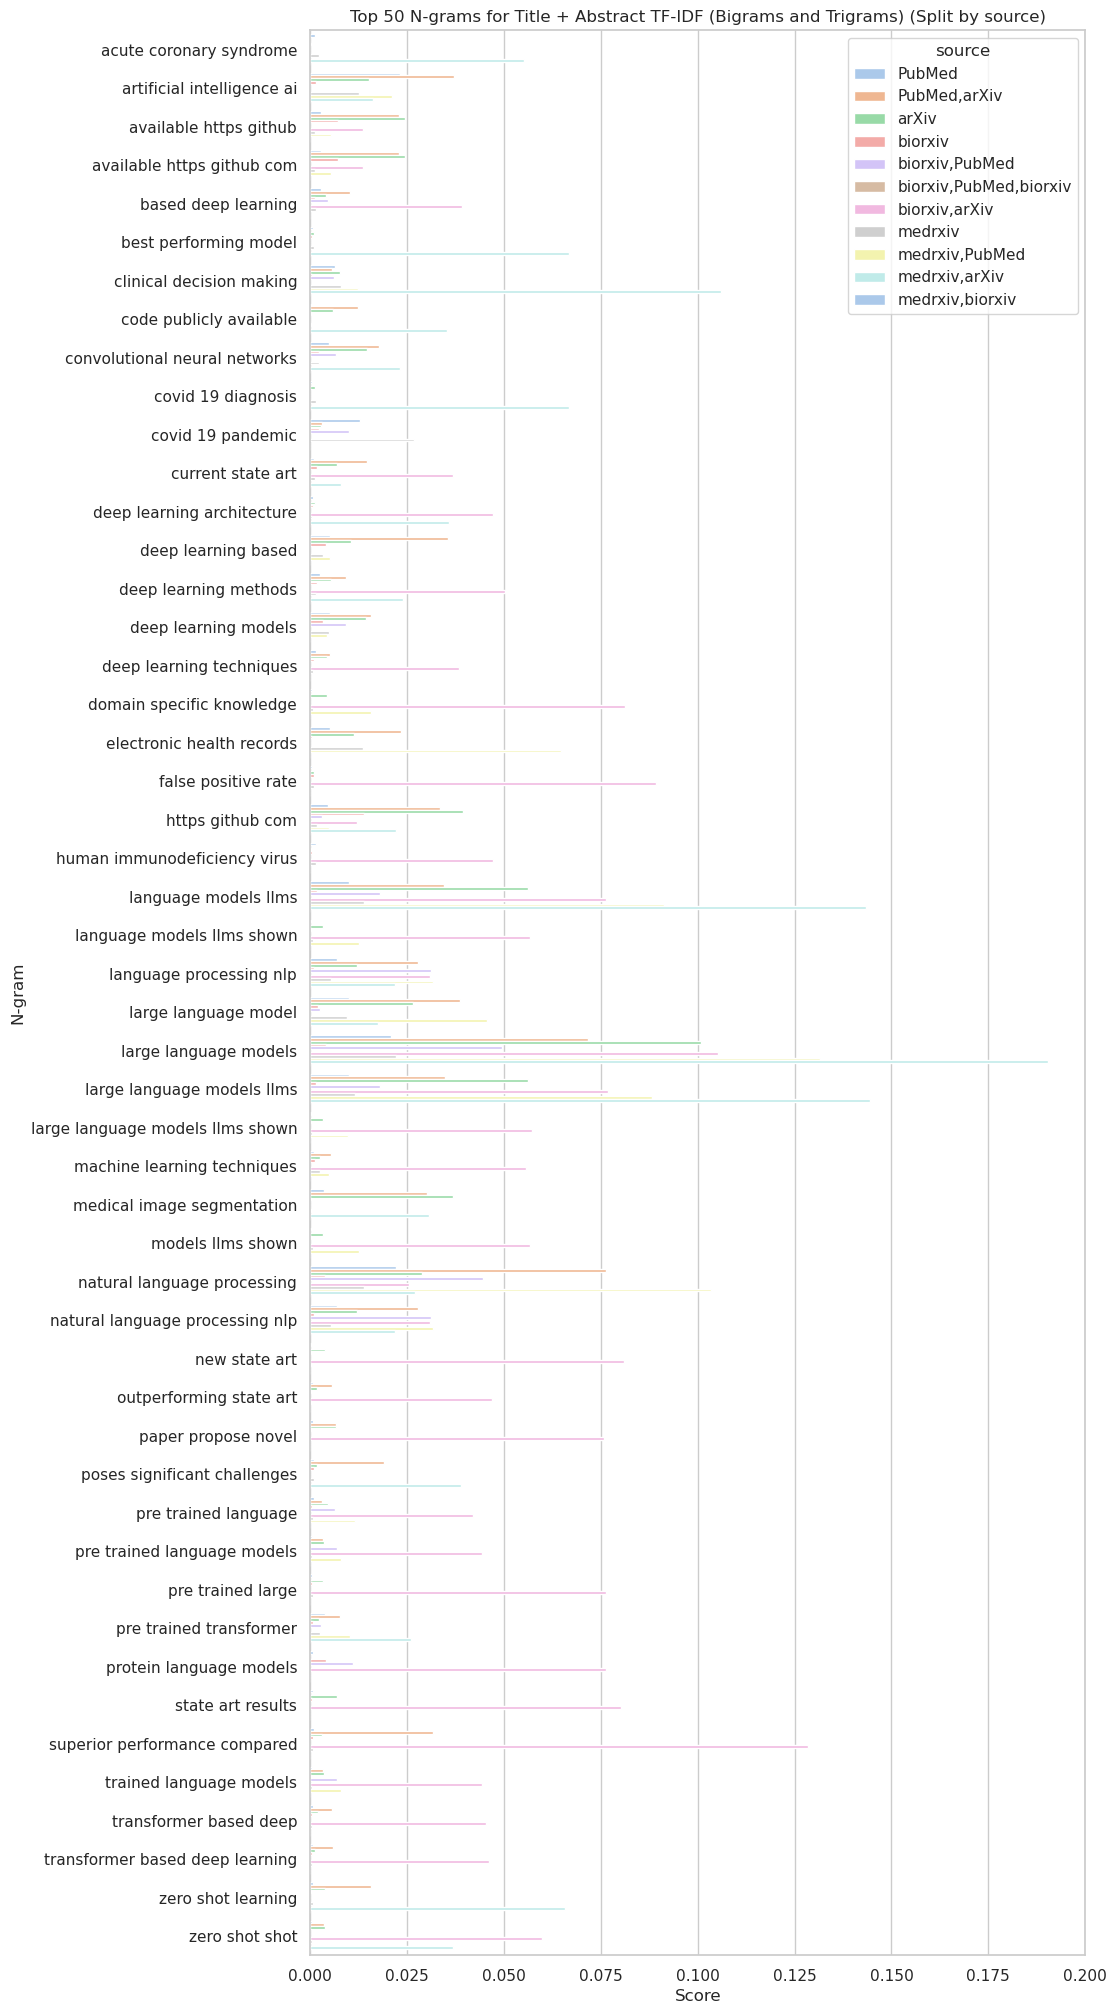

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Modify the TF-IDF extraction function to handle n-grams
def extract_tfidf_and_frequency_ngrams(df, text_column, ngram_range=(2, 3)):
    # TF-IDF Vectorizer for bigrams and trigrams
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=ngram_range, max_features=1000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df[text_column])
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

    # Frequency (Count) Vectorizer for bigrams and trigrams
    count_vectorizer = CountVectorizer(stop_words='english', ngram_range=ngram_range, max_features=1000)
    count_matrix = count_vectorizer.fit_transform(df[text_column])
    count_feature_names = count_vectorizer.get_feature_names_out()
    count_df = pd.DataFrame(count_matrix.toarray(), columns=count_feature_names)

    return tfidf_df, count_df

# Function to plot bigrams and trigrams with source column
def plot_top_ngrams_with_source(df, source_col, title, top_n=50):
    """
    Plots the top N n-grams from a DataFrame where each column represents a term
    (bigram or trigram) and each row represents a document, splitting bars based on the source column.
    """
    # Melt the dataframe to long format for seaborn, keeping the source column
    df_long = df.melt(id_vars=[source_col], var_name="term", value_name="score")
    
    # Group by source and term, and compute mean score per group
    df_grouped = df_long.groupby([source_col, "term"]).mean().reset_index()
    
    # Select the top N terms by average score across all sources
    top_terms = df_grouped.groupby("term")["score"].mean().sort_values(ascending=False).head(top_n).index
    df_top = df_grouped[df_grouped["term"].isin(top_terms)]
    
    # Plotting
    sns.set(style="whitegrid", palette="pastel")
    plt.figure(figsize=(10, 25))
    
    # Create a grouped bar plot where bars are split by source
    sns.barplot(x="score", y="term", hue=source_col, data=df_top, palette="pastel")
    
    # Customize the plot
    plt.title(f"Top {top_n} N-grams for {title} (Split by {source_col})")
    plt.xlabel("Score")
    plt.ylabel("N-gram")
    plt.legend(title=source_col)
    plt.show()

# Example usage:
# Extract bigrams and trigrams for title + abstract column
title_abstract_tfidf_ngrams, title_abstract_count_ngrams = extract_tfidf_and_frequency_ngrams(df, 'title_abstract', ngram_range=(3, 5))

# Assuming 'source' column is available in your dataframe (e.g., journal name, study type)
# Plot for title+abstract bigrams/trigrams TF-IDF, splitting bars by source
plot_top_ngrams_with_source(title_abstract_tfidf_ngrams.assign(source=df['source']), 'source', "Title + Abstract TF-IDF (Bigrams and Trigrams)")

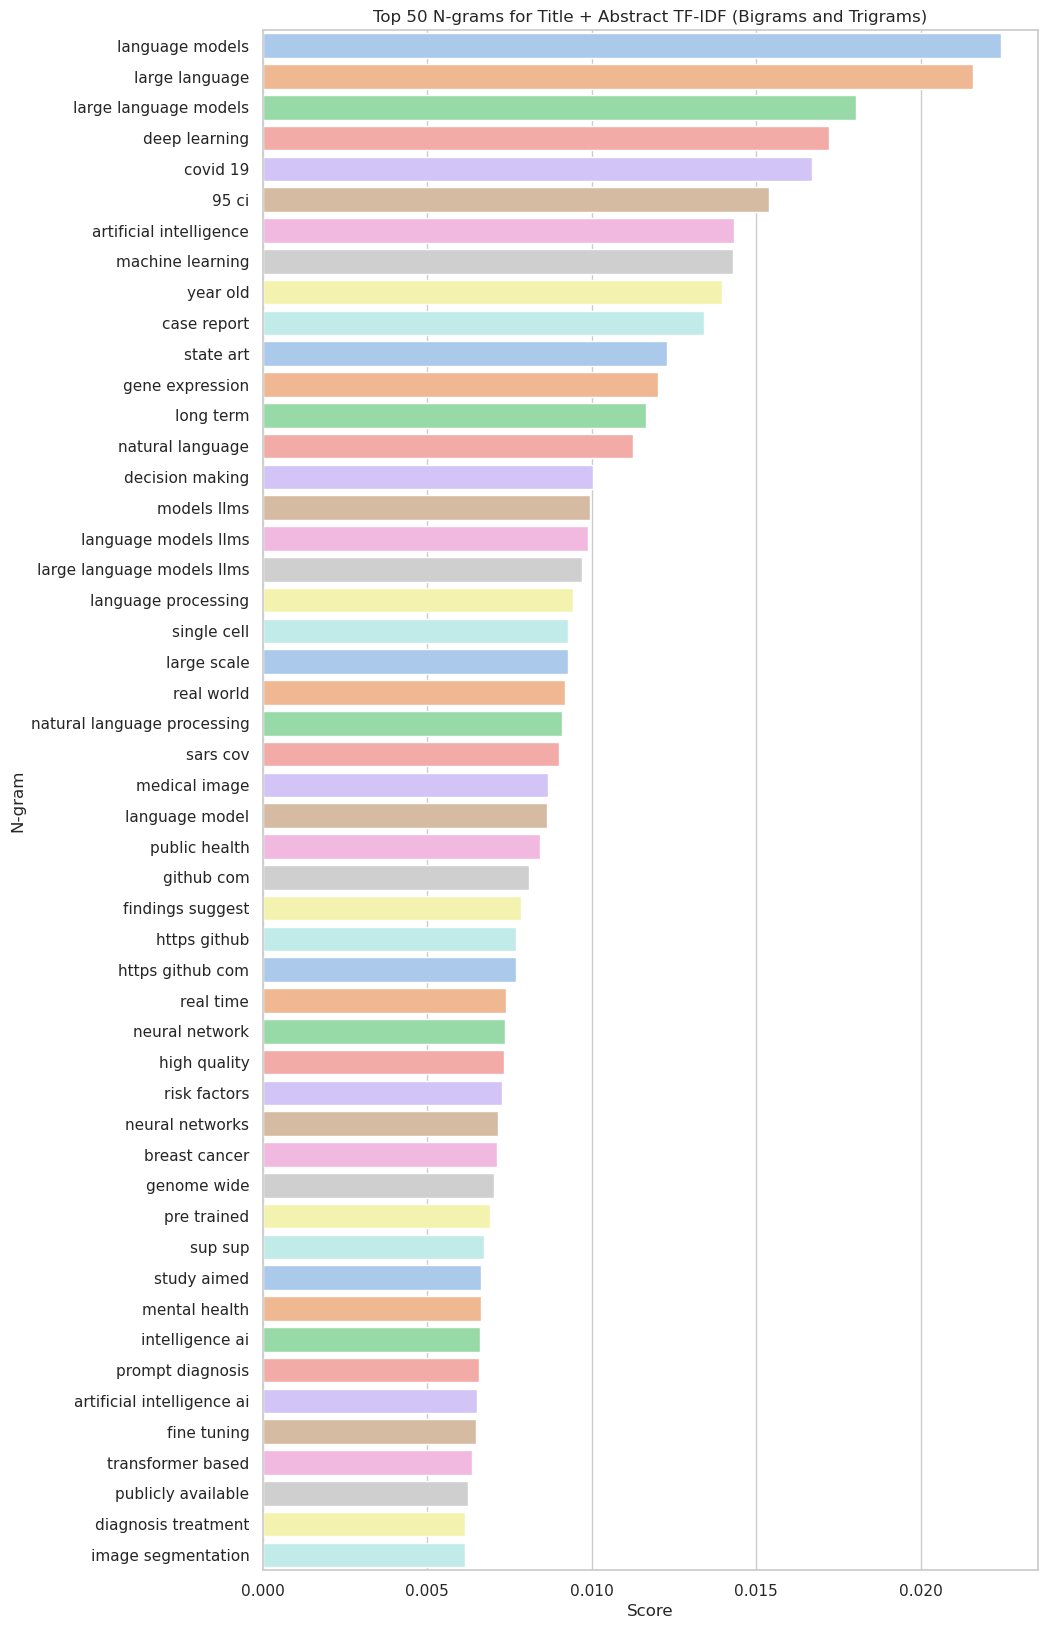

In [50]:
# Function to plot bigrams and trigrams without source splitting
def plot_top_ngrams(df, title, top_n=50):
    """
    Plots the top N n-grams from a DataFrame where each column represents a term
    (bigram or trigram) and each row represents a document.
    """
    # Get average scores per term
    term_scores = df.mean().sort_values(ascending=False).head(top_n)
    
    # Create a DataFrame for plotting
    term_df = pd.DataFrame({'term': term_scores.index, 'score': term_scores.values})
    
    # Plotting
    sns.set(style="whitegrid", palette="pastel")
    plt.figure(figsize=(10, 20))
    
    # Create a bar plot for top terms
    sns.barplot(x="score", y="term", data=term_df, palette="pastel")
    
    # Customize the plot
    plt.title(f"Top {top_n} N-grams for {title}")
    plt.xlabel("Score")
    plt.ylabel("N-gram")
    plt.show()

# Example usage:
# Extract bigrams and trigrams for title + abstract column
title_abstract_tfidf_ngrams, title_abstract_count_ngrams = extract_tfidf_and_frequency_ngrams(df, 'title_abstract', ngram_range=(2, 4))

# Plot for title+abstract bigrams/trigrams TF-IDF
plot_top_ngrams(title_abstract_tfidf_ngrams, "Title + Abstract TF-IDF (Bigrams and Trigrams)")

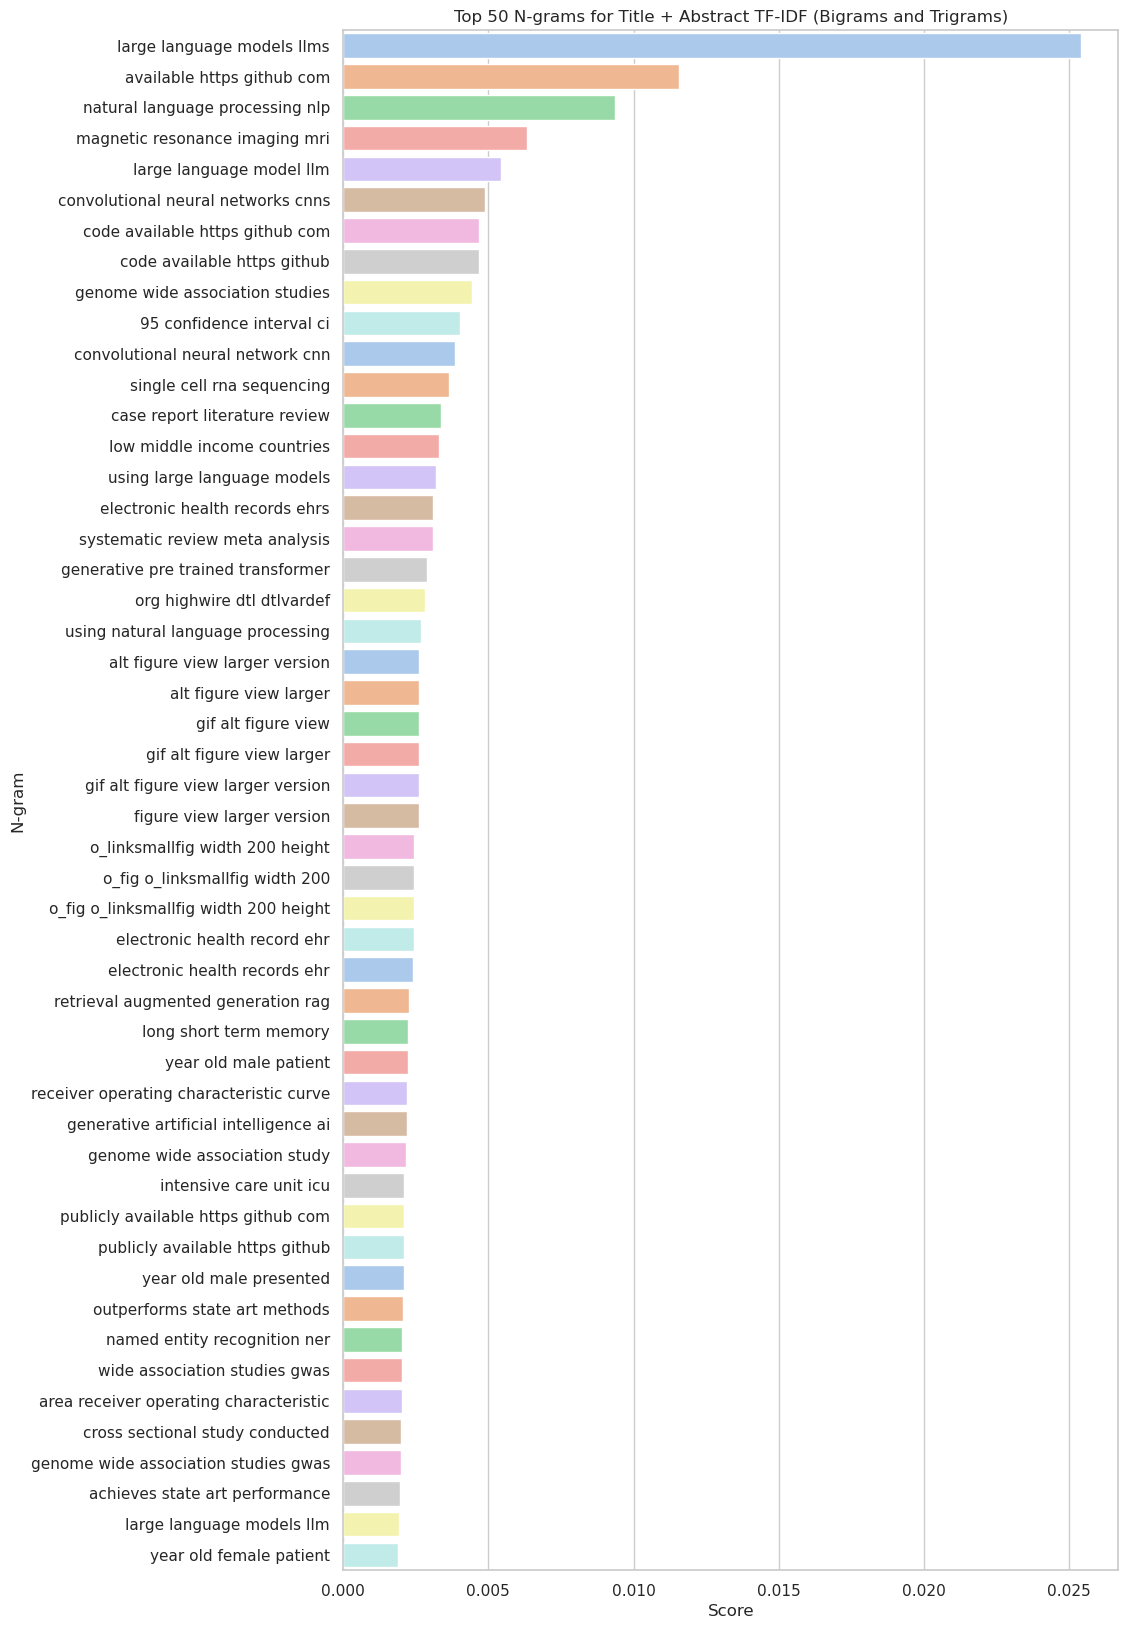

In [51]:
# Example usage:
# Extract bigrams and trigrams for title + abstract column
title_abstract_tfidf_ngrams, title_abstract_count_ngrams = extract_tfidf_and_frequency_ngrams(df, 'title_abstract', ngram_range=(4, 6))

# Plot for title+abstract bigrams/trigrams TF-IDF
plot_top_ngrams(title_abstract_tfidf_ngrams, "Title + Abstract TF-IDF (Bigrams and Trigrams)")

## Exclude some words

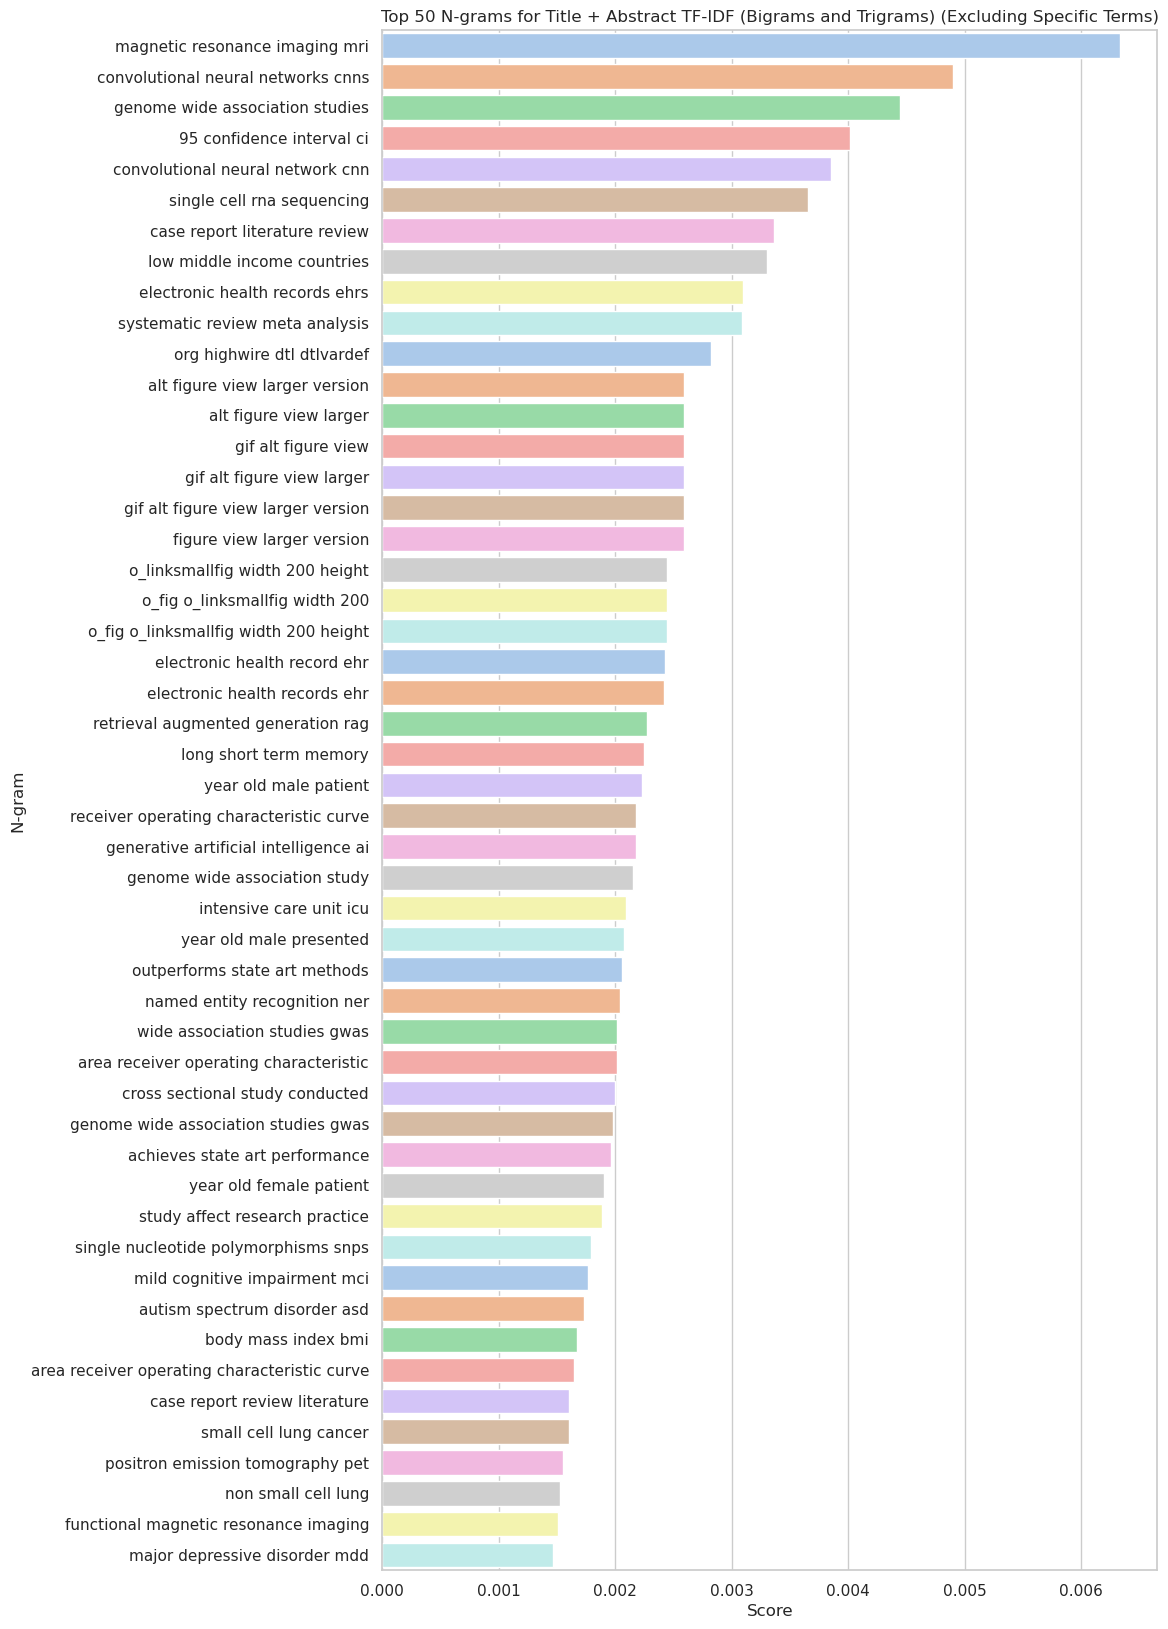

In [52]:
# Function to plot bigrams and trigrams without source splitting, excluding specific n-grams
def plot_top_ngrams_with_exclusion(df, title, top_n=50, exclude_terms=None):
    """
    Plots the top N n-grams from a DataFrame where each column represents a term
    (bigram or trigram) and each row represents a document. Excludes specific terms.
    """
    if exclude_terms is None:
        exclude_terms = ['language', 'model', 'models', 'learning', 'llm', 'llms']

    # Get average scores per term
    term_scores = df.mean().sort_values(ascending=False)
    
    # Filter out n-grams that contain any of the excluded terms
    filtered_term_scores = term_scores[~term_scores.index.str.contains('|'.join(exclude_terms))]
    
    # Select the top N terms after filtering
    top_terms = filtered_term_scores.head(top_n)
    
    # Create a DataFrame for plotting
    term_df = pd.DataFrame({'term': top_terms.index, 'score': top_terms.values})
    
    # Plotting
    sns.set(style="whitegrid", palette="pastel")
    plt.figure(figsize=(10, 20))
    
    # Create a bar plot for top terms
    sns.barplot(x="score", y="term", data=term_df, palette="pastel")
    
    # Customize the plot
    plt.title(f"Top {top_n} N-grams for {title} (Excluding Specific Terms)")
    plt.xlabel("Score")
    plt.ylabel("N-gram")
    plt.show()

# Example usage:
# Extract bigrams and trigrams for title + abstract column
title_abstract_tfidf_ngrams, title_abstract_count_ngrams = extract_tfidf_and_frequency_ngrams(df, 'title_abstract', ngram_range=(4,6))

# Plot for title+abstract bigrams/trigrams TF-IDF, excluding specific terms
plot_top_ngrams_with_exclusion(title_abstract_tfidf_ngrams, "Title + Abstract TF-IDF (Bigrams and Trigrams)", exclude_terms=['language', 'model', 'models', 'learning', 'llm', 'llms', 'github', 'transformer'])


## Save clinical

In [7]:
# df_cleaned_clinic = df_cleaned_clinic.iloc[511:]

(24190, 5)
(15588, 5)
(9537, 5)
(207, 5)


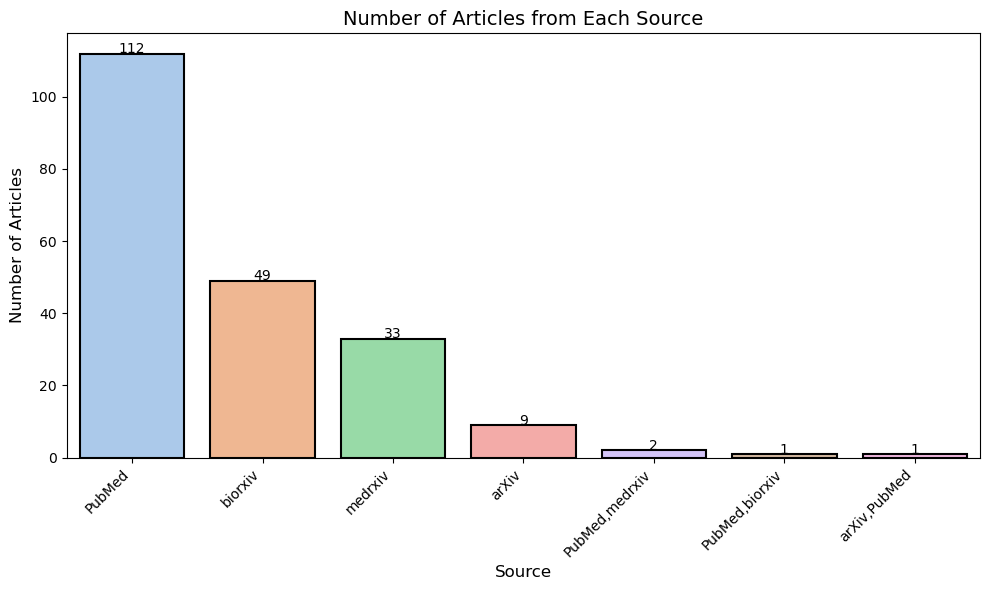

In [8]:
def delete_list(x, list_strings):
    x = x.lower()
    for string in list_strings:
        x = x.replace(string, "")
    return x

def filter_df(df, phrases_to_include, column='title_abstract'):
    filter_condition = df[column].str.contains('|'.join(phrases_to_include), case=False, na=False)
    return df[filter_condition]

phrases_to_include_list = [
    ["LLM", "large language model", "NLP", "natural language processing",
     "GPT", "chatGPT", "transformer", "BERT", "Bidirectional Encoder Representation", 
     "RAG", "retrieval-augmented generation", "retrieval augmented generation", 
     "generative AI", "AI assistant", "prompt", "chatbot", "prompt engineering", 
     "attention mechanism", "chain-of-thought", "chain of thought"],
    ['electronic health record', 'ehr', 'clinical', 
     'cds', 'medical', 'syndrome', 'phenotype', "complex trait"],
    ["inherited", "hereditary", "heredity", "inheritance", "heritability", 
     "gwas", "genome-wide", "genome wide", "association study", "association studies", 
     "genetics", "genetical", "variant interpretation", "genomic variant", "genomic variation", "human genomic", "human genetic"]
]

words_to_remove = ['eragrostis', 'smallmouth', 'fragile', 'angptl', 'intragenic', 'fragment', 'hallmark', 'uvrag', 'leverag', 'storag', 'averag', 'coverag', 'encourag', 'forage', "liraglutid"]

df_cleaned_clinic = deepcopy(df)

df_cleaned_clinic['title_abstract_removed'] = df_cleaned_clinic['title_abstract'].apply(lambda x: delete_list(x, words_to_remove))


print(df_cleaned_clinic.shape)
for phrases_to_include in phrases_to_include_list:
    df_cleaned_clinic = filter_df(df_cleaned_clinic, phrases_to_include, 'title_abstract_removed')
    df_cleaned_clinic = filter_df(df_cleaned_clinic, phrases_to_include, 'title_abstract')[['title', 'abstract', 'source', 'title_abstract', 'title_abstract_removed']]
    print(df_cleaned_clinic.shape)
    
df_cleaned_clinic = df_cleaned_clinic[~df_cleaned_clinic.abstract.apply(lambda x: str(x)=="nan")]
df_cleaned_clinic.shape
df_cleaned_clinic[['title', 'abstract', 'source',]].to_csv('data/clinic_genetic.csv', index=False)
plot_article_source_histogram(df_cleaned_clinic)

In [1]:
a, b, c = [
   ["LLM", "large language model", "NLP", "natural language processing",
     "GPT", "chatGPT", "transformer", "BERT", "Bidirectional Encoder Representation", 
     "RAG", "retrieval-augmented generation", "retrieval augmented generation", 
     "generative AI", "AI assistant", "prompt", "chatbot", "prompt engineering", 
     "attention mechanism", "chain-of-thought", "chain of thought"],
    ['electronic health record', 'ehr', 'clinical', 
     'cds', 'medical', 'syndrome', 'phenotype', "complex trait"],
    ["inherited", "hereditary", "heredity", "inheritance", "heritability", 
     "gwas", "genome-wide", "genome wide", "association study", "association studies", 
     "genetics", "genetical", "variant interpretation", "genomic variant", "genomic variation", "human genomic", "human genetic"]
]


print(", ".join(a))
print(", ".join(b))
print(", ".join(c))

LLM, large language model, NLP, natural language processing, GPT, chatGPT, transformer, BERT, Bidirectional Encoder Representation, RAG, retrieval-augmented generation, retrieval augmented generation, generative AI, AI assistant, prompt, chatbot, prompt engineering, attention mechanism, chain-of-thought, chain of thought
electronic health record, ehr, clinical, cds, medical, syndrome, phenotype, complex trait
inherited, hereditary, heredity, inheritance, heritability, gwas, genome-wide, genome wide, association study, association studies, genetics, genetical, variant interpretation, genomic variant, genomic variation, human genomic, human genetic
